In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
data  = pd.read_csv("Downloads/cleaned_review_data.csv")
data.head()

,Unnamed: 0,category,rating,label,text,tokens,joined_text
0,0,Home_and_Kitchen_5,5.0,CG,love this well made sturdy and very comfortab...,"['love', 'well', 'made', 'sturdy', 'comfortabl...",love well made sturdy comfortable love itvery ...
1,1,Home_and_Kitchen_5,5.0,CG,love it a great upgrade from the original ive...,"['love', 'great', 'upgrade', 'original', 'ive'...",love great upgrade original ive mine couple year
2,2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back i love the look and ...,"['pillow', 'saved', 'back', 'love', 'look', 'f...",pillow saved back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,missing information on how to use it but it is...,"['missing', 'information', 'use', 'great', 'pr...",missing information use great product price
4,4,Home_and_Kitchen_5,5.0,CG,very nice set good quality we have had the set...,"['nice', 'set', 'good', 'quality', 'set', 'two...",nice set good quality set two month


In [3]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
texts = data['joined_text']

In [5]:
data.isnull().sum()

category       0
rating         0
label          0
text           1
tokens         0
joined_text    1
dtype: int64

In [6]:
texts = texts.dropna()

In [7]:
# Tf - Idf vecotization for K-means
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [8]:
# Apply K-Means
num_clusters = 5
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(tfidf_matrix)

C:\Users\adith\.conda\include\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [9]:
# Extract Top Words for Each Cluster
def get_kmeans_topics(cluster_centers, terms, n_top_words=10):
    topics = []
    for cluster_idx, cluster in enumerate(cluster_centers):
        top_indices = cluster.argsort()[-n_top_words:][::-1]
        topics.append([terms[i] for i in top_indices])
    return topics

In [10]:
kmeans_topics = get_kmeans_topics(kmeans_model.cluster_centers_, tfidf_vectorizer.get_feature_names_out())

In [11]:
# Count Vectorization for LDA
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
count_matrix = count_vectorizer.fit_transform(texts)

In [12]:
# Apply LDA
lda_model = LatentDirichletAllocation(n_components=num_clusters, random_state=42)
lda_model.fit(count_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [13]:
# Extract LDA Topics
def get_lda_topics(lda_model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

In [14]:
lda_topics = get_lda_topics(lda_model, count_vectorizer.get_feature_names_out())

In [15]:
lda_topics

[['movie',
  'good',
  'like',
  'time',
  'film',
  'great',
  'story',
  'acting',
  'life',
  'watch'],
 ['book',
  'story',
  'read',
  'character',
  'good',
  'love',
  'series',
  'great',
  'author',
  'enjoyed'],
 ['dog',
  'love',
  'cat',
  'work',
  'great',
  'use',
  'product',
  'like',
  'food',
  'good'],
 ['like',
  'use',
  'work',
  'time',
  'good',
  'great',
  'dont',
  'make',
  'really',
  'water'],
 ['great',
  'love',
  'little',
  'bought',
  'good',
  'fit',
  'size',
  'nice',
  'quality',
  'small']]

In [35]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# already fitted an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)  # tfidf_matrix is your term-frequency matrix

# Extract feature names (words)
terms = tfidf_vectorizer.get_feature_names_out()  # vectorizer is TF-IDF vectorizer

# Get topic-word matrix (each row represents a topic, each column represents a word)
topic_words = lda.components_

# Display the top words for each topic
n_top_words = 10  # Top 10 words per topic
for topic_idx, topic in enumerate(topic_words):
    print(f"Topic {topic_idx + 1}:")
    # Get top words and their weights for this topic
    top_word_idx = topic.argsort()[:-n_top_words - 1:-1]
    for idx in top_word_idx:
        print(f"  {terms[idx]}: {topic[idx]:.4f}")


Topic 1:
  movie: 622.2346
  book: 334.4656
  story: 243.4313
  good: 191.3020
  film: 189.2142
  time: 164.8980
  read: 161.2033
  watch: 158.1458
  like: 153.8547
  love: 153.0003
Topic 2:
  book: 1207.3229
  read: 765.4756
  story: 733.2270
  character: 609.9146
  good: 363.6030
  series: 351.5414
  enjoyed: 325.2171
  author: 288.3500
  reading: 277.6146
  loved: 255.5167
Topic 3:
  dog: 623.2151
  cat: 309.0282
  love: 248.4913
  work: 200.2491
  great: 196.5125
  product: 195.0848
  food: 192.4406
  use: 191.1178
  like: 171.5072
  problem: 152.0287
Topic 4:
  fit: 486.5359
  size: 380.6495
  comfortable: 371.2366
  love: 286.0062
  nice: 285.3112
  wear: 282.4904
  great: 260.5147
  shoe: 258.7377
  little: 252.7776
  look: 230.1928
Topic 5:
  great: 554.2300
  love: 510.9796
  work: 385.9042
  bought: 384.1978
  light: 343.3953
  good: 332.4505
  quality: 311.6202
  use: 298.4681
  product: 296.1107
  easy: 295.3825


In [17]:
# Print Results
print("K-Means Topics:")
for i, topic in enumerate(kmeans_topics):
    print(f"Cluster {i+1}: {topic}")

K-Means Topics:
Cluster 1: ['dog', 'love', 'food', 'small', 'great', 'product', 'treat', 'cat', 'toy', 'bought']
Cluster 2: ['great', 'work', 'good', 'like', 'use', 'little', 'nice', 'quality', 'product', 'easy']
Cluster 3: ['movie', 'good', 'acting', 'watch', 'story', 'great', 'love', 'film', 'action', 'like']
Cluster 4: ['love', 'fit', 'size', 'son', 'great', 'bought', 'comfortable', 'little', 'shoe', 'wear']
Cluster 5: ['book', 'read', 'story', 'character', 'series', 'author', 'enjoyed', 'good', 'reading', 'developed']


In [18]:
print("\nLDA Topics:")
for i, topic in enumerate(lda_topics):
    print(f"Topic {i+1}: {topic}")


LDA Topics:
Topic 1: ['movie', 'good', 'like', 'time', 'film', 'great', 'story', 'acting', 'life', 'watch']
Topic 2: ['book', 'story', 'read', 'character', 'good', 'love', 'series', 'great', 'author', 'enjoyed']
Topic 3: ['dog', 'love', 'cat', 'work', 'great', 'use', 'product', 'like', 'food', 'good']
Topic 4: ['like', 'use', 'work', 'time', 'good', 'great', 'dont', 'make', 'really', 'water']
Topic 5: ['great', 'love', 'little', 'bought', 'good', 'fit', 'size', 'nice', 'quality', 'small']


In [39]:
# LDA topics and their top words
lda_topics = {
    "Topic 1": ['movie', 'good', 'like', 'time', 'film', 'great', 'story', 'acting', 'life', 'watch'],
    "Topic 2": ['book', 'story', 'read', 'character', 'good', 'love', 'series', 'great', 'author', 'enjoyed'],
    "Topic 3": ['dog', 'love', 'cat', 'work', 'great', 'use', 'product', 'like', 'food', 'good'],
    "Topic 4": ['like', 'use', 'work', 'time', 'good', 'great', 'dont', 'make', 'really', 'water'],
    "Topic 5": ['great', 'love', 'little', 'bought', 'good', 'fit', 'size', 'nice', 'quality', 'small']
}

# names for each topic
topic_names = {
    "Topic 1": "Movies and Entertainment",
    "Topic 2": "Books and Literature",
    "Topic 3": "Pets and Products",
    "Topic 4": "Everyday Use and Experiences",
    "Topic 5": "Shopping and Fashion"
}

#topics with their assigned names
for topic, keywords in lda_topics.items():
    print(f" {topic_names[topic]}: {', '.join(keywords)}")
    #print(f" {', '.join(keywords)}")
    print()


 Movies and Entertainment: movie, good, like, time, film, great, story, acting, life, watch

 Books and Literature: book, story, read, character, good, love, series, great, author, enjoyed

 Pets and Products: dog, love, cat, work, great, use, product, like, food, good

 Everyday Use and Experiences: like, use, work, time, good, great, dont, make, really, water

 Shopping and Fashion: great, love, little, bought, good, fit, size, nice, quality, small



## Wordcloud

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

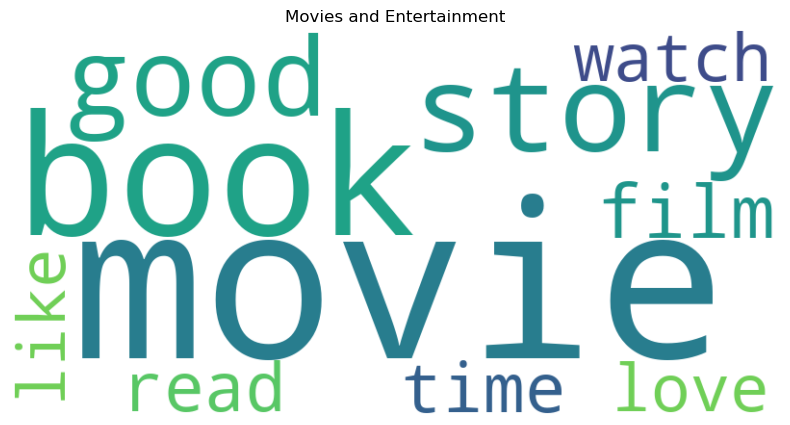

In [42]:
topic_keywords = {
  "movie": 622.2346,
  "book": 334.4656,
  "story": 243.4313,
  "good": 191.3020,
  "film": 189.2142,
  "time": 164.8980,
  "read": 161.2033,
  "watch": 158.1458,
  "like": 153.8547,
  "love": 153.0003}

#Generate wordcloud
wordcloud = WordCloud(width = 800, height = 400 , background_color = 'white').generate_from_frequencies(topic_keywords)

# Save the word cloud as an image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Movies and Entertainment")
plt.savefig("topic_wordcloud.png")  # Saves the image in your working directory
plt.show()

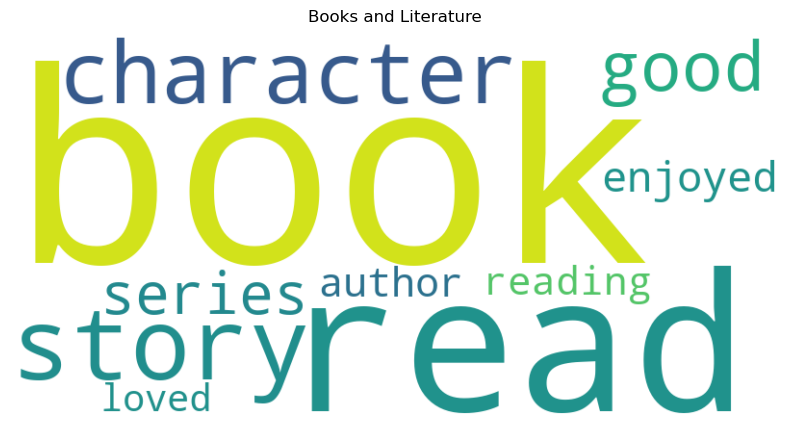

In [45]:
topic_keywords = {
  "book": 1207.3229,
  "read": 765.4756,
  "story": 733.2270,
  "character": 609.9146,
  "good": 363.6030,
  "series": 351.5414,
  "enjoyed": 325.2171,
  "author": 288.3500,
  "reading": 277.6146,
  "loved": 255.5167
}

#Generate wordcloud
wordcloud = WordCloud(width = 800, height = 400 , background_color = 'white').generate_from_frequencies(topic_keywords)

# Save the word cloud as an image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Books and Literature")
plt.show()

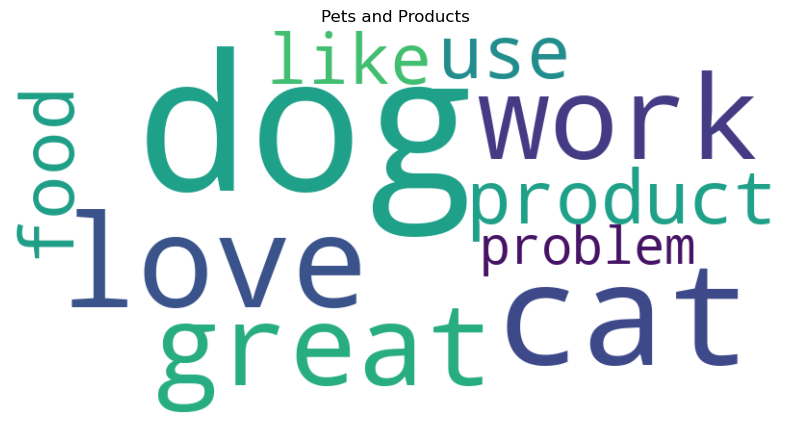

In [46]:
topic_keywords = {
  "dog": 623.2151,
  "cat": 309.0282,
  "love": 248.4913,
  "work": 200.2491,
  "great": 196.5125,
  "product": 195.0848,
  "food": 192.4406,
  "use": 191.1178,
  "like": 171.5072,
  "problem": 152.0287
}

#Generate wordcloud
wordcloud = WordCloud(width = 800, height = 400 , background_color = 'white').generate_from_frequencies(topic_keywords)

# Save the word cloud as an image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Pets and Products")
plt.show()

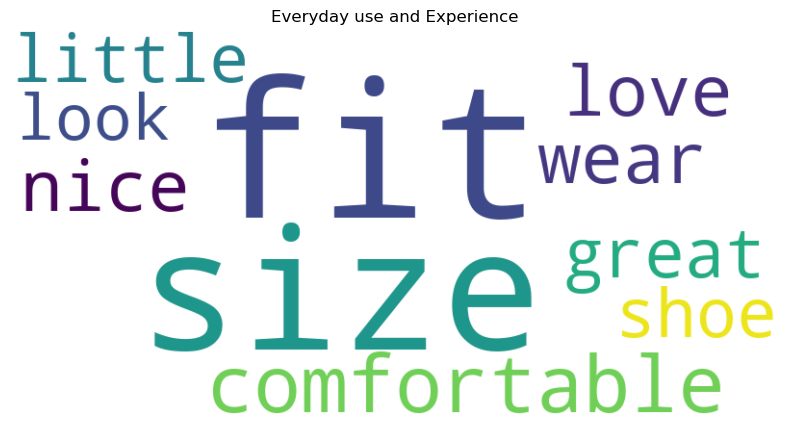

In [47]:
topic_keywords = {
  "fit": 486.5359,
  "size": 380.6495,
  "comfortable": 371.2366,
  "love": 286.0062,
  "nice": 285.3112,
  "wear": 282.4904,
  "great": 260.5147,
  "shoe": 258.7377,
  "little": 252.7776,
  "look": 230.1928
}

#Generate wordcloud
wordcloud = WordCloud(width = 800, height = 400 , background_color = 'white').generate_from_frequencies(topic_keywords)

# Save the word cloud as an image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Everyday use and Experience")
plt.show()

## Sentiment Analysis using Pre-trained model

In [25]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Perform sentiment analysis
data["Sentiment"] = data["text"].apply(lambda x: sentiment_pipeline(x)[0]['label'])

print(data)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
module 'inspect' has no attribute 'ArgSpec'

In [19]:
!pip install --upgrade transformers keras tensorflow


                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB 65.6 kB/s eta 0:00:19
                                              0.0/1.2 MB 65.6 kB/s eta 0:00:19
                                              0.0/1.2 MB 65.6 kB/s eta 0:00:19
                                              0.0/1.2 MB 65.6 kB/s eta 0:00:19
                                              0.0/1.2 MB 65.6 kB/s eta 0:00:19
     -                                        0.0/1.2 MB 54.6 kB/s eta 0:00:22
     -                                        0.0/1.2 MB 54.6 kB/s eta 0:00:22
     -                                        0.0/1.2 MB 54.6 kB/s eta 0:00:22
     -       

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib

In [28]:
!pip install tensorflow==2.13 keras==2.13.1


  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB 165.2 kB/s eta 0:00:11
                                              0.0/1.7 MB 165.2 kB/s eta 0:00:11
                                              0.0/1.7 MB 165.2 kB/s eta 0:00:11
                                              0.0/1.7 MB 140.9 kB/s eta 0:00:12
                                              0.0/1.7 MB 140.9 kB/s eta 0:00:12
                                              0.0/1.7 MB 140.9 kB/s eta 0:00:12
                                              0.0/1.7 MB 140.9 kB/s eta 0:00:12
     -                                        0.1/1.7 MB 105.0 kB/s eta 0:00:16
     -                                        0.1/1.7 MB 105.0 kB/s eta 0:00:16
     -                                        0.1/1.7 MB 105.8 kB/s et

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (from tensorflow==2.13):
        Expected sha256 b3a12aefc0bbacdb0132674bc3fed03a70c14c91d48b00d13fcefee15d868e36
             Got        8c4d9576f06055a4229ce277b9f5286bc12ad5eb1b8fcb21465f9e950256654f




     -----                                 40.4/276.6 MB 141.3 kB/s eta 0:27:51
     -----                                 40.4/276.6 MB 141.3 kB/s eta 0:27:51
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                                 40.4/276.6 MB 140.6 kB/s eta 0:28:01
     -----                             

In [21]:
!pip uninstall keras

^C


In [22]:
!pip install --upgrade tensorflow


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
                                              0.0/390.2 MB ? eta -:--:--
                                              0.0/390.2 MB ? eta -:--:--
                                              0.0/390.2 MB ? eta -:--:--
                                              0.0/390.2 MB ? eta -:--:--
                                              0.0/390.2 MB ? eta -:--:--
                                              0.0/390.2 MB ? eta -:--:--
                                              0.0/390.2 MB ? eta -:--:--
                                            0.0/390.2 MB 109.5 kB/s eta 0:59:23
                                            0.0/390.2 MB 109.5 kB/s eta 0:59:23
                                            0.0/390.2 MB 109.5 kB/s eta 0:59:23
                                             0.0/390.2 MB 85.6 kB/s eta 1:16:00
                                             0.0/390.2 MB 85.6 kB/s eta 1:16:00
                     

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\adith\.conda\include\New folder\Lib

                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                             3.9/390.2 MB 61.8 kB/s eta 1:44:14
                                        

In [26]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="LiYuan/amazon-review-sentiment-analysis")

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

C:\Users\adith\.conda\include\New folder\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\adith\.cache\huggingface\hub\models--LiYuan--amazon-review-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
module 'inspect' has no attribute 'ArgSpec'

In [27]:
!pip show Tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\adith\.conda\include\New folder\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
